# My take on Stack Overflow Survey 2020

Hi! My name is **Marcus**, and, upfront I want to thank you for your time assessing my code. This was coded for Project 1 of the Udacity\'s Data Science Nanodegree. 

As you can see, I was deeply influenced by [Josh Bernhard's Medium post on how to become a programmer](https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711). However, I'm more interested in descriptive analysis of the Doctoral degree holder type than in any predictive model. This is even more true when I realized that the recently published 2020's Stack Overflow survey's results are quite different than the 2017's one, notably with pratically no fields about how people broke into the field. Plus, one of the take aways from Josh's analyses was that this question is that there is no scientific-proven formula to break into the field. Additionally, I'm one of these degree holders looking forward to break into the industry and it wouldn't hurt to understand a bit further the influence of their field of origin in their outcome.

You see, doctoral degrees varies a lot, especially in terms of programming experience and expertise. Someone with a degree in the humanities might not have to code a single line while someone from the computer science field will definitely have an edge. Thus, I'm deeply interested in knowing better my peers, especially the successfull ones. Who are they? What they are doing? What are their educational background? Do this background influences their outcome in job satisfaction and compensation?   

Thus, here are my questions of interested, and how I pretend to present the data in my own blog post:

Part I. Do you even work?

1. What's the employment rate of the group and how does it compare with the other educational backgrounds?

Part II. Ok, let's break it down.

2. What's the employment rate per field of origin?
3. What's the average programming experience, prior to first pro activity, per field of origin?
4. What's the average compensation, prior to first pro activity, per field of origin?

Part III. Is there a link between success and field of origin?

5. For how long the successfull ones (compensation and job satisfaction) are coding, and what are their field of origin?

For the sake of data exploration, I'll play a bit around with the data in this jupyter notebook befora tackling the questions at hand.


In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('./data/survey_results_public.csv', dtype=str)

# Select the columns of interest
columns_of_interest = ["ConvertedComp", "Country", "DevType", "EdLevel", "Employment", "JobFactors", "JobSat", "NEWEdImpt", "NEWLearn", "UndergradMajor", "WorkWeekHrs", "YearsCode", "YearsCodePro"]

df_narrowed = df[columns_of_interest]
df_narrowed.head()

df_narrowed.head()

,ConvertedComp,Country,DevType,EdLevel,Employment,JobFactors,JobSat,NEWEdImpt,NEWLearn,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,NaN,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Languages, frameworks, and other technologies ...",Slightly satisfied,Fairly important,Once a year,"Computer science, computer engineering, or sof...",50,36,27
1,NaN,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Very dissatisfied,Fairly important,Once a year,"Computer science, computer engineering, or sof...",NaN,7,4
2,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,4,NaN
3,NaN,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,Not at all important/not necessary,Once a year,"Computer science, computer engineering, or sof...",40,7,4
4,NaN,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,Very important,Once a year,"Computer science, computer engineering, or sof...",NaN,15,8


## Looking into my people
By "my people" I meant the ones from Brazil, with a doctoral degree of any sort in the natural sciences.

In [3]:
# Checking how many like me are out there
# First, I'm selecting the respondents who are from Brazil and hold a PhD or related degree

df_like_me = df_narrowed[df_narrowed["Country"] == "Brazil"][df_narrowed["EdLevel"] == "Other doctoral degree (Ph.D., Ed.D., etc.)"]

df_like_me.shape

(26, 13)

In [4]:
# Here, I'm trying to count the values of their field of origin
df_like_me["UndergradMajor"].value_counts()

Computer science, computer engineering, or software engineering                   12
A natural science (such as biology, chemistry, physics, etc.)                      4
Mathematics or statistics                                                          2
Another engineering discipline (such as civil, electrical, mechanical, etc.)       2
A business discipline (such as accounting, finance, marketing, etc.)               2
A health science (such as nursing, pharmacy, radiology, etc.)                      2
A social science (such as anthropology, psychology, political science, etc.)       1
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1
Name: UndergradMajor, dtype: int64

In [5]:
# Take a closer look into the four that are more like me

df_like_me[df["UndergradMajor"] == "A natural science (such as biology, chemistry, physics, etc.)"]

,ConvertedComp,Country,DevType,EdLevel,Employment,JobFactors,JobSat,NEWEdImpt,NEWLearn,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
3934,22536,Brazil,Data scientist or machine learning specialist,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,Industry that I’d be working in;Diversity of t...,Slightly dissatisfied,Very important,Every few months,"A natural science (such as biology, chemistry,...",40,7,2
15304,49476,Brazil,NaN,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,Flex time or a flexible schedule;Remote work o...,Slightly dissatisfied,Critically important,Once every few years,"A natural science (such as biology, chemistry,...",40,35,13
16823,32988,Brazil,Academic researcher;Educator;Scientist,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,Specific department or team I’d be working on;...,Slightly satisfied,Not at all important/not necessary,Once every few years,"A natural science (such as biology, chemistry,...",40,30,18
18639,14568,Brazil,Data scientist or machine learning specialist;...,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,"Languages, frameworks, and other technologies ...",Slightly satisfied,Fairly important,Once a year,"A natural science (such as biology, chemistry,...",44,11,6


# General Data Preparation 

For all upcoming questions, I'll first considered only "Employed full-time", "Independent contractor, freelancer, or self-employed" and "Employed part-time" as "Employed". The rest will be considered "Unemployed". I'll use a custom function to build a dummy collumn summarizing these values like I just described.

The resulting dataframe will be the base for all further data wrangling.

In [6]:
# Check the value counts of "Employment"
df_narrowed["Employment"].value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [7]:
# A function that will convert to "Employed" if "Employment" is equal to "Employed full-time", "Independent contractor, freelancer, or self-employed", "Employed part-time"
def employment_discrete(df):
    """
    Return a list of converted values based on "Employment"
    "Employed full-time", "Independent contractor, freelancer, or self-employed", "Employed part-time" will be converted to "Employed", the others to "Unemployed"

    Parameters:
    df (pd.dataframe): Data

    Return:
    list: List of converted values

    """
    converted = []
    employment = ["Employed full-time", "Independent contractor, freelancer, or self-employed", "Employed part-time"]

    for entry in df["Employment"]:
        if str(entry) == "nan":
            converted.append("NaN")
        elif str(entry) in employment:
            converted.append("Employed")
        else:
            converted.append("Unemployed")
    return converted

In [8]:
# Create a new column, "EmploymentStatus", based on the converted values of "Employment"
df_narrowed["EmploymentStatus"] = employment_discrete(df_narrowed)

## 1. How many of them are currently employed?

Here, I'll compare the proportion of employed ones between the different educational background.

1. I'll build a dataframe from the previously edited dataframe with the results grouped by "EdLevel" and its employment rate based on the counts of the EmploymentStatus dummy column.

3. Finally, I'll create a bar chart showing the proportion of employment by educational level.


In [129]:
# Create a new dataframe dividing the counts of "EmploymentStatus" = "Employed", grouped by "EdLevel", by the total count of "EmploymentStatus" based on "EdLevel"
df_results01 = df_narrowed[["EdLevel", "EmploymentStatus"]][df_narrowed["EmploymentStatus"] == "Employed"].groupby("EdLevel").count() / df_narrowed[["EdLevel", "EmploymentStatus"]].groupby("EdLevel").count()

df_results01 = df_results01.reset_index()

df_results01.sort_values(["EmploymentStatus"], inplace=True)

df_results01

,EdLevel,EmploymentStatus
5,Primary/elementary school,0.291180
7,"Secondary school (e.g. American high school, G...",0.465521
2,I never completed any formal education,0.703854
8,Some college/university study without earning ...,0.770825
0,"Associate degree (A.A., A.S., etc.)",0.842105
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.887499
6,"Professional degree (JD, MD, etc.)",0.905000
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.934487
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",0.934911


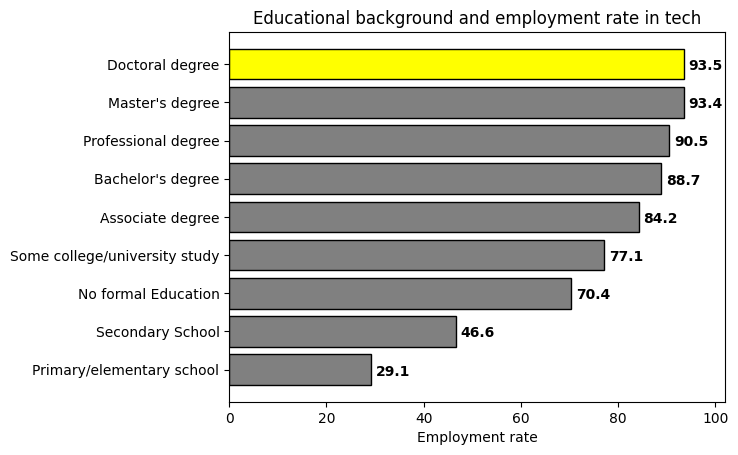

In [143]:
# Create the plot
fig, ax = plt.subplots()

# Prepare data
y = df_results01["EdLevel"]
#y = pd.Series(["Associate degree", "Bachelor's degree", "No formal Education", "Master's degree", "Doctoral degree", "Primary/elementary school", "Professional degree", "Secondary School", "Some college/university study"])
y = pd.Series(["Primary/elementary school", "Secondary School", "No formal Education", "Some college/university study", "Associate degree", "Bachelor's degree", "Professional degree", "Master's degree", "Doctoral degree"])
y_pos = np.arange(len(y))
x = df_results01["EmploymentStatus"] * 100

# Set up the chart
bar_colors = ["grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "yellow"]
ax.barh(y_pos, x, align='center', color=bar_colors, edgecolor='black')
ax.set_title('Educational background and employment rate in tech')

# Y setup
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
#ax.invert_yaxis() 

# X setup
ax.set_xlabel('Employment rate')
ax.set_xlim(right=102)

# Add the values as labels for each bar
for i, v in enumerate(x):
    ax.text(v + 1, i - .15, str(round(v, 1)), color='black', fontweight='bold')

plt.show()

## 2. What's the employment rate per field of origin?

Here, I'll compare the proportion of employed ones between the different field of origin of doctoral degree holders, exclusively. For that, I'll be using the transformed `df_narrowed`, to count on the "EmploymentStatus" column.

1. Then, I'll build a dataframe selecting the specific "EdLevel" and grouping by "MajorUndegrad", counting the employment rate based on the counts of the "EmploymentStatus" dummy column.

3. Finally, I'll build a radar chart showing the different employment rates based on the field of origin.

In [126]:
# Create a new dataframe dividing the counts of "EmploymentStatus" = "Employed", grouped by "UndergradMajor" when "EdLevel" equals to "Other doctoral degre...", by the total count of "EmploymentStatus" based on the same criteria
df_results02 = df_narrowed[["UndergradMajor", "EmploymentStatus"]][df_narrowed["EdLevel"] == "Other doctoral degree (Ph.D., Ed.D., etc.)"][df_narrowed["EmploymentStatus"] == "Employed"].groupby("UndergradMajor").count()  / df_narrowed[["UndergradMajor", "EmploymentStatus"]][df_narrowed["EdLevel"] == "Other doctoral degree (Ph.D., Ed.D., etc.)"].groupby("UndergradMajor").count()

df_results02 = df_results02.drop("I never declared a major").reset_index()

df_results02

,UndergradMajor,EmploymentStatus
0,"A business discipline (such as accounting, fin...",0.791667
1,"A health science (such as nursing, pharmacy, r...",0.809524
2,"A humanities discipline (such as literature, h...",0.948718
3,"A natural science (such as biology, chemistry,...",0.942857
4,"A social science (such as anthropology, psycho...",0.966667
5,"Another engineering discipline (such as civil,...",0.919786
6,"Computer science, computer engineering, or sof...",0.947899
7,Fine arts or performing arts (such as graphic ...,0.888889
8,"Information systems, information technology, o...",0.852941
9,Mathematics or statistics,0.958580


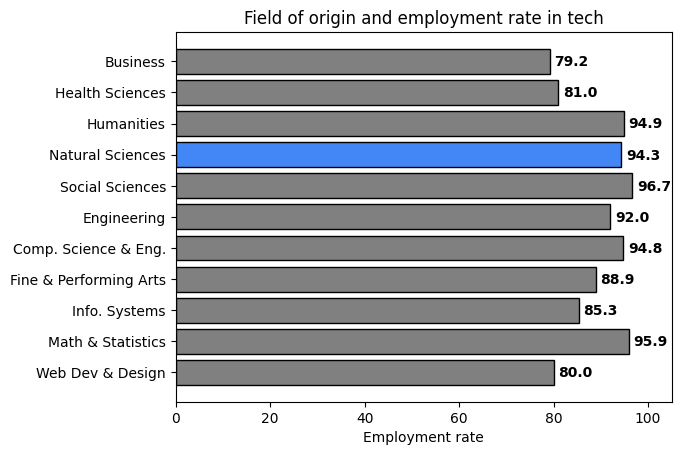

In [127]:
# Create the plot
fig, ax = plt.subplots()

# Prepare data#
y = df_results02["UndergradMajor"]
y = pd.Series(["Business", "Health Sciences", "Humanities", "Natural Sciences", "Social Sciences", "Engineering", "Comp. Science & Eng.", "Fine & Performing Arts", "Info. Systems", "Math & Statistics", "Web Dev & Design"])
y_pos = np.arange(len(y))
x = df_results02["EmploymentStatus"] * 100

# Set up the chart
bar_colors = ["grey", "grey", "grey", "#4287f5", "grey", "grey", "grey", "grey", "grey", "grey", "grey"]
ax.barh(y_pos, x, align='center', color=bar_colors, edgecolor='black')
ax.set_title('Field of origin and employment rate in tech')

# Y setup
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() 

# X setup
ax.set_xlabel('Employment rate')
ax.set_xlim(right=105)

# Add the values as labels for each bar
for i, v in enumerate(x):
    ax.text(v + 1, i + 0.15, str(round(v, 1)), color='black', fontweight='bold')

plt.show()

# 3. What's the average programming experience, prior to first pro activity, per field of origin?

It's not surprise that people from different fields of origin might have been exposed to different experiences, and that includes programming. So it's important to have a look on the programming experience of doctoral degree holders with different educational background in order to understand their employment rate in this industry. Thus, for that:

1. First, I'll convert the columns "YearsCode" and "YearsCodePro" to float.

2. Then, I'll create a dataframe selecting doctors from "EdLevel", and then passing the "MajorUndergrad" column and a new column calculated from the difference between "YearsCode" and "YearsCodePro". 

3. A horizontal bar chart will be used to display the averages per field of origin.

In [11]:
# Convert the columns YearsCode and YearsCodePro to a numeric type
# Replace the values "Less than 1 year" and "More than 50 years" to something that can be subtracted. For the sake of simplicity, I'm replacing them for 1 and 50, respectivelly
df_narrowed["YearsCode"] = pd.to_numeric(df_narrowed["YearsCode"].replace("Less than 1 year", "1").replace("More than 50 years", "50"))
df_narrowed["YearsCodePro"] = pd.to_numeric(df_narrowed["YearsCodePro"].replace("Less than 1 year", "1").replace("More than 50 years", "50"))

# Create a new column, "YearsDiff", to hold the difference between "YearsCode" and "YearsCodePro"
df_narrowed["YearsDiff"] = df_narrowed["YearsCode"] - df_narrowed["YearsCodePro"]

# Filter the doctoral degree holders and "YearsDiff" >= 0, groupy by educational background and calculate the mean of "YearsDiff"
df_results03 = df_narrowed[df_narrowed["EdLevel"] == "Other doctoral degree (Ph.D., Ed.D., etc.)"][df_narrowed["YearsDiff"] >= 0].groupby("UndergradMajor")["YearsDiff"].mean().round(2).reset_index()

df_results03

,UndergradMajor,YearsDiff
0,"A business discipline (such as accounting, fin...",5.12
1,"A health science (such as nursing, pharmacy, r...",11.44
2,"A humanities discipline (such as literature, h...",7.10
3,"A natural science (such as biology, chemistry,...",8.79
4,"A social science (such as anthropology, psycho...",6.22
5,"Another engineering discipline (such as civil,...",9.74
6,"Computer science, computer engineering, or sof...",9.72
7,Fine arts or performing arts (such as graphic ...,11.50
8,"Information systems, information technology, o...",7.16
9,Mathematics or statistics,10.06


# 4. What's the average compensation per field of origin?

Very similar to the previous question, however, instead of looking into the years of programming experience before the first professional activity in the field, I'll be looking at the sallary in USD. 

1. First, I'll convert the columns "ConvertedComp" to float.

2. Then, I'll create a dataframe selecting doctors from "EdLevel", and then passing the "MajorUndergrad" column and "ConvertedComp". 

3. A horizontal bar chart will be used to display the averages per field of origin.

In [12]:
# Convert the column "ConvertedComp" to a numeric type
df_narrowed["ConvertedComp"] = pd.to_numeric(df_narrowed["ConvertedComp"])

# Create a new df selecting employed doctoral degree holders, grouping by educational background and getting the average on their compensation
df_results04 = df_narrowed[df_narrowed["EdLevel"] == "Other doctoral degree (Ph.D., Ed.D., etc.)"][df_narrowed["EmploymentStatus"] == "Employed"].groupby("UndergradMajor")["ConvertedComp"].mean().round(2).reset_index()

# This isn't needed anymore as there was no responded with "UndergradMajor" equals to "I never declared a major" had a paid position ("EmploymentStatus" = "Employed"), apparently 
# df_results04 = df_results04.drop("I never declared a major").reset_index()

df_results04

,UndergradMajor,ConvertedComp
0,"A business discipline (such as accounting, fin...",52288.27
1,"A health science (such as nursing, pharmacy, r...",72568.08
2,"A humanities discipline (such as literature, h...",86511.89
3,"A natural science (such as biology, chemistry,...",112839.99
4,"A social science (such as anthropology, psycho...",174780.58
5,"Another engineering discipline (such as civil,...",133896.72
6,"Computer science, computer engineering, or sof...",124894.03
7,Fine arts or performing arts (such as graphic ...,78741.17
8,"Information systems, information technology, o...",140409.71
9,Mathematics or statistics,129701.94


## Social Sciences got the biggest piece of the cake? Is that right?
It's interesting to see if these values are not being affected by smaller sampling for some of these educational backgrounds. The hypothesis is, if there aren't many respondents from, say, non-traditional coding majors like the ones in social sciences, the higher salary average could be explained by this small number and the fact that they might been outliers. A simple count would give us an idea.

In [13]:
df_narrowed["UndergradMajor"].value_counts().drop("I never declared a major").reset_index()

,index,UndergradMajor
0,"Computer science, computer engineering, or sof...",31582
1,"Another engineering discipline (such as civil,...",4754
2,"Information systems, information technology, o...",4071
3,"A natural science (such as biology, chemistry,...",2205
4,Mathematics or statistics,1849
5,Web development or web design,1789
6,"A business discipline (such as accounting, fin...",1375
7,"A humanities discipline (such as literature, h...",1007
8,"A social science (such as anthropology, psycho...",933
9,Fine arts or performing arts (such as graphic ...,725


# 5. For how long the successfull ones (compensation and job satisfaction) are coding, and what are their field of origin?

Finally, I would like to take a look at the two variables more often related to success, compensation and job satisfaction, and how they are related to code experience and the field of origin. I'm basically adding job satisfaction into this pool, and providing one, summary chart (a 4-variable bubble chart).

1. Similarly with what I did for general data preparation, I'll create a function to add a column that translates "JobSat" into numeric values.

1. Then, I'll select the following columns for all doctoral degree holders: "MajorUndergrad", "ConvertedComp", "YearsDiff", "JobSat". 

2. Finally, I'll create a four-variable bubble chart, with "JobSat" x "ConvertedComp" on x and y, respectivelly, the bubble sizes defined by "CodeExperience" and colored according to "MajorUndergrad". Each educational background will be a data point in this chart.

In [14]:
# A function that will convert "JobSat" into a numeric, discrete column
def jobsat_discrete(df):
    """
    Return a list of converted values based on "JobSat"

    Parameters:
    df (pd.dataframe): Data

    Return:
    list: List of converted values

    """
    converted = []

    for entry in df["JobSat"]:
        if str(entry) == "Very satisfied":
            converted.append(5)
        elif str(entry) == "Slightly satisfied":
            converted.append(4)
        elif str(entry) == "Slightly dissatisfied":
            converted.append(3)
        elif str(entry) == "Neither satisfied nor dissatisfied":
            converted.append(2)
        else:
            converted.append(1)

    return converted

In [15]:
# Create a new df selecting employed doctoral degree holders, passing only the columns "UndergradMajor", "ConvertedComp", "JobSat" and "YearsDiff"
df_results05 = df_narrowed[df_narrowed["EdLevel"] == "Other doctoral degree (Ph.D., Ed.D., etc.)"][df_narrowed["EmploymentStatus"] == "Employed"][["UndergradMajor", "ConvertedComp", "JobSat", "YearsDiff"]]

# Create a new column, "JobSatConvert", based on the values of "JobSat"
df_results05["JobSatConvert"] = jobsat_discrete(df_results05)

# Transform the df into a new df grouped by the respondents' educational backgroun, getting the mean of all selected columns
df_results05 = df_results05.groupby("UndergradMajor").mean().round(2).reset_index()

# Re-order the columns to the x, y and bubble size of upcoming chart
df_results05 = df_results05[["UndergradMajor", "JobSatConvert", "YearsDiff", "ConvertedComp"]]

df_results05

,UndergradMajor,JobSatConvert,YearsDiff,ConvertedComp
0,"A business discipline (such as accounting, fin...",3.11,4.59,52288.27
1,"A health science (such as nursing, pharmacy, r...",3.53,11.44,72568.08
2,"A humanities discipline (such as literature, h...",3.84,6.78,86511.89
3,"A natural science (such as biology, chemistry,...",3.82,8.76,112839.99
4,"A social science (such as anthropology, psycho...",3.71,6.05,174780.58
5,"Another engineering discipline (such as civil,...",3.71,9.52,133896.72
6,"Computer science, computer engineering, or sof...",3.70,9.61,124894.03
7,Fine arts or performing arts (such as graphic ...,3.25,11.50,78741.17
8,"Information systems, information technology, o...",3.34,7.16,140409.71
9,Mathematics or statistics,3.68,9.99,129701.94
